In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<ipython-input-4-4addd0ae159c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
from zipfile import ZipFile
file_name = "/content/Traffic_sign_dataset..zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, '/content/train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Check if data is loaded properly
if len(data) == 0 or len(labels) == 0:
    raise ValueError("No data was loaded. Check the directory paths and image loading process.")

print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 83s 84ms/step - loss: 1.7410 - accuracy: 0.5597 - val_loss: 0.3588 - val_accuracy: 0.9243
Epoch 2/15
981/981 [==============================] - 80s 82ms/step - loss: 0.5375 - accuracy: 0.8462 - val_loss: 0.1414 - val_accuracy: 0.9689
Epoch 3/15
981/981 [==============================] - 80s 81ms/step - loss: 0.3548 - accuracy: 0.8980 - val_loss: 0.1504 - val_accuracy: 0.9639
Epoch 4/15
981/981 [==============================] - 80s 82ms/step - loss: 0.3004 - accuracy: 0.9149 - val_loss: 0.1110 - val_accuracy: 0.9689
Epoch 5/15
981/981 [==============================] - 80s 81ms/step - loss: 0.2575 - accuracy: 0.9277 - val_loss: 0.1030 - val_accuracy: 0.9772
Epoch 6/15
981/981 [==============================] - 80s 81ms/step - loss: 0.2647 - accuracy: 0.9293 - val_loss: 0.0621 - val_accuracy: 0.9857
Epoch 7/15
981/981 [==============================] - 80s 81ms/step - loss: 0.2509 - accuracy: 0.9329 - val_loss: 0.0619 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


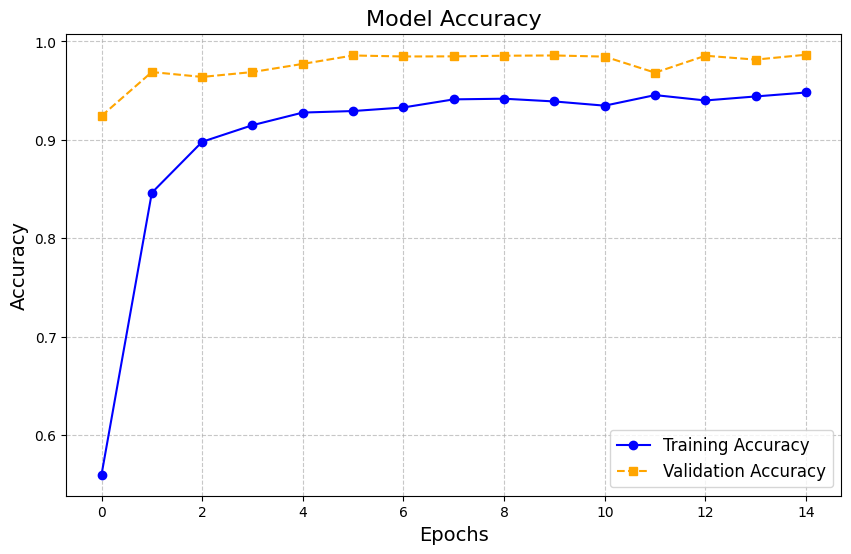

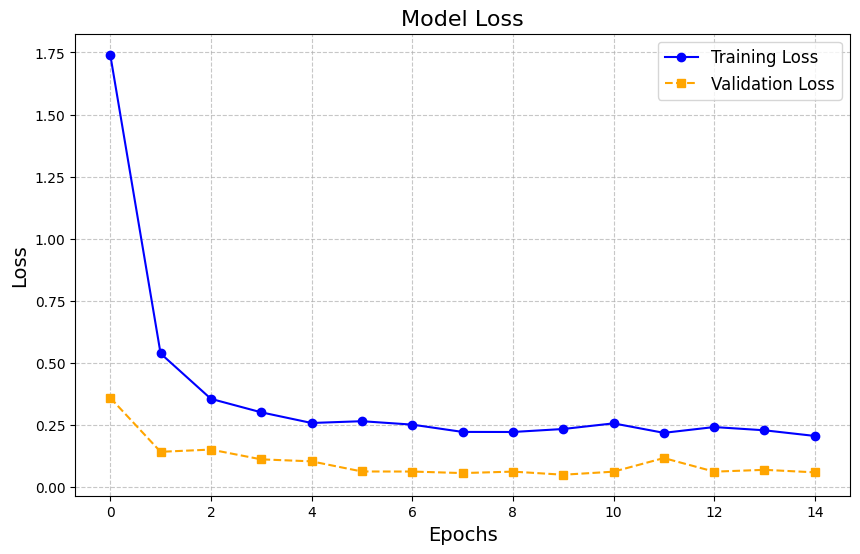

In [ ]:
import matplotlib.pyplot as plt

# Improved Accuracy Plot
plt.figure(figsize=(10, 6))  # Increase figure size
plt.plot(history.history['accuracy'], marker='o', linestyle='-', label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy', color='orange')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Improved Loss Plot
plt.figure(figsize=(10, 6))  # Increase figure size
plt.plot(history.history['loss'], marker='o', linestyle='-', label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], marker='s', linestyle='--', label='Validation Loss', color='orange')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)  # Get the class with highest probability
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

395/395 [==============================] - 9s 23ms/step
0.9524940617577197


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install streamlit


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.45.224.86


In [ ]:
! streamlit run Traffic_sign_app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴your url is: https://nice-months-attend.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.45.224.86:8501

2024-12-26 18:25:23.906 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.
1/1 [==============================] - 0s 147ms/step
  Stopping...
^C
